In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,  CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [25]:
print(os.getcwd())

C:\Users\govin\OneDrive\Desktop\Python\Linkedin_job_postings


In [26]:
job_postings_data = pd.read_csv('C:/Users/govin/OneDrive/Desktop/Python/Linkedin_job_postings/job_details/job_postings.csv')
job_benefits_data = pd.read_csv('C:/Users/govin/OneDrive/Desktop/Python/Linkedin_job_postings/job_details/benefits.csv')
job_industries = pd.read_csv('C:/Users/govin/OneDrive/Desktop/Python/Linkedin_job_postings/job_details/job_industries.csv')
job_skills_data = pd.read_csv('C:/Users/govin/OneDrive/Desktop/Python/Linkedin_job_postings/job_details/job_skills.csv')
company_data = pd.read_csv('C:/Users/govin/OneDrive/Desktop/Python/Linkedin_job_postings/company_details/companies.csv')
employee_counts_data = pd.read_csv('C:/Users/govin/OneDrive/Desktop/Python/Linkedin_job_postings/company_details/employee_counts.csv')
company_industries_data = pd.read_csv('C:/Users/govin/OneDrive/Desktop/Python/Linkedin_job_postings/company_details/company_industries.csv')
company_specialities_data = pd.read_csv('C:/Users/govin/OneDrive/Desktop/Python/Linkedin_job_postings/company_details/company_specialities.csv')



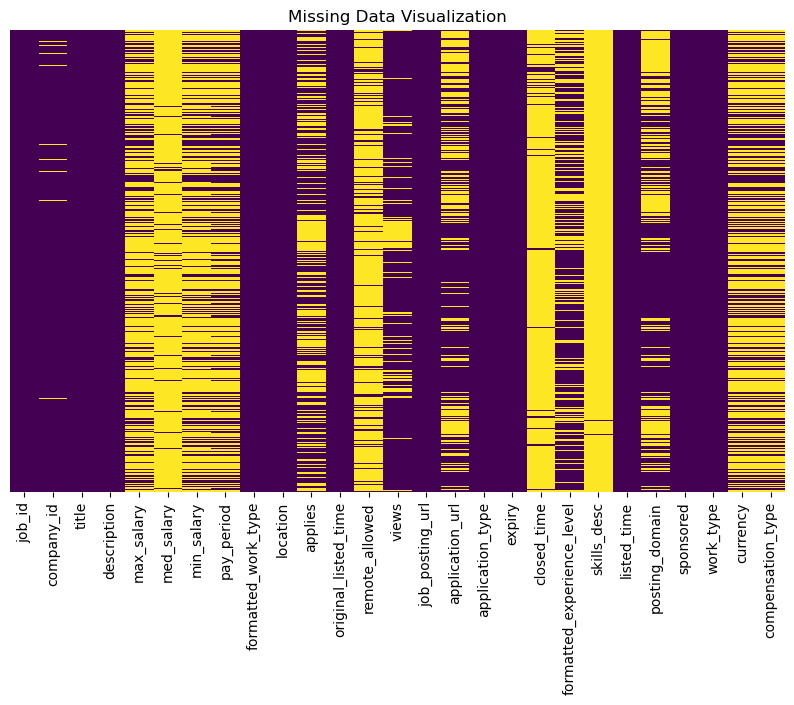

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(job_postings_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Visualization")
plt.show()



In [28]:
# Check the number of unique values in merging columns for each dataset
unique_values = {
    'job_postings_data': job_postings_data['job_id'].nunique(),
    'job_benefits_data': job_benefits_data['job_id'].nunique(),
    'job_industries': job_industries['job_id'].nunique(),
    'job_skills_data': job_skills_data['job_id'].nunique(),
    'company_data': company_data['company_id'].nunique(),
    'employee_counts_data': employee_counts_data['company_id'].nunique(),
    'company_industries_data': company_industries_data['company_id'].nunique(),
    'company_specialities_data': company_specialities_data['company_id'].nunique()
}

unique_values

{'job_postings_data': 15886,
 'job_benefits_data': 5496,
 'job_industries': 15960,
 'job_skills_data': 15637,
 'company_data': 6063,
 'employee_counts_data': 6030,
 'company_industries_data': 6003,
 'company_specialities_data': 4487}

In [29]:
duplicates = job_postings_data['job_id'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

In [30]:
job_postings_data['job_id'].isnull().sum()


0

In [31]:

job_benefits_data = job_benefits_data.drop('inferred', axis=1) # remove 'inferred' column
job_benefits_data = job_benefits_data.groupby('job_id')['type'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job benefits

### Merging main dataframe with job benefits

In [32]:
job_postings_data = job_postings_data.merge(job_benefits_data, on="job_id", how="left")
job_postings_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in..."
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1692834553000,NaN,0,FULL_TIME,NaN,NaN,"Medical insurance, 401(k), Vision insurance"
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,NaN,1692729872000,NaN,0,CONTRACT,NaN,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,NaN,NaN,1692832007000,NaN,0,FULL_TIME,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,NaN,1692867714000,NaN,1,FULL_TIME,NaN,NaN,"Medical insurance, Vision insurance, Dental in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,NaN,Entry level,NaN,1692744734000,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,NaN,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,NaN,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,NaN,Mid-Senior level,NaN,1692744071000,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,NaN


### Also merging duplicate job_id on job_skills.csv and join them into the main dataframe



In [33]:
job_skills_data = job_skills_data.groupby('job_id')['skill_abr'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job skills

job_postings_data = job_postings_data.merge(job_skills_data, on="job_id", how="left")
job_postings_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type,skill_abr
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in...","SALE, BD"
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,1692834553000,NaN,0,FULL_TIME,NaN,NaN,"Medical insurance, 401(k), Vision insurance","SALE, BD"
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,1692729872000,NaN,0,CONTRACT,NaN,NaN,NaN,"ACCT, FIN"
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,NaN,1692832007000,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,1692867714000,NaN,1,FULL_TIME,NaN,NaN,"Medical insurance, Vision insurance, Dental in...","DSGN, ART, IT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,Entry level,NaN,1692744734000,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN,NaN,"ENG, IT"
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,NaN,ADM
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,NaN,HCPR
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,Mid-Senior level,NaN,1692744071000,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,NaN,OTHR


### Cleaning company details data

In [34]:
company_industries_data = company_industries_data.groupby('company_id')['industry'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same company industries

company_specialities_data = company_specialities_data.groupby('company_id')['speciality'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same company specialities

employee_counts_data = employee_counts_data.groupby('company_id')['time_recorded'].max().reset_index() # get newest data based on 'time_recorded' column


In [35]:
company_data = company_data.merge(company_industries_data, on="company_id", how="left")
company_data = company_data.merge(company_specialities_data, on="company_id", how="left")
company_data = company_data.merge(employee_counts_data, on="company_id", how="left")
company_data

,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,"Information Technology & Services, Information...","Cloud, Mobile, Cognitive, Security, Research, ...",1.692851e+09
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower,Renewables & Environment,"Distributed Power, Gasification, Generators, H...",1.692866e+09
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,Information Technology & Services,NaN,1.692840e+09
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,"Information Technology & Services, Information...","enterprise, software, applications, database, ...",1.692867e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo,NaN,NaN,NaN
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan,NaN,NaN,NaN
6060,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources,NaN,NaN,NaN
6061,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group,NaN,NaN,NaN


### Merging job postings and company data together and we have data about company that post jobs on linkedIn.

In [36]:
merged_data = job_postings_data.merge(company_data, on="company_id", how="left")
merged_data

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.0,California,US,Santa Clarita,28358,Constellation Rd,https://www.linkedin.com/company/cargologinllc,Transportation/Trucking/Railroad,"Export & Import Clearance, Bonded Warehousing,...",1.692835e+09
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,https://www.linkedin.com/company/employvision,Staffing & Recruiting,NaN,1.692772e+09
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,2.0,Texas,US,Forney,75126,1003 College St,https://www.linkedin.com/company/fbc-forney,Religious Institutions,NaN,1.692832e+09
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.0,California,US,San Francisco,94103,310 Seventh Street,https://www.linkedin.com/company/ken-fulk-inc.,Design,NaN,1.692868e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,5.0,California,US,Los Angeles,90045,6601 Center Dr W,https://www.linkedin.com/company/aspire-bakeries,"Food Production, Food Production, Food Product...",NaN,1.692869e+09
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,https://www.linkedin.com/company/holyname,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,https://www.linkedin.com/company/holyname,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,7.0,New York,US,New York,0,630 West 168th St.,https://www.linkedin.com/company/columbiamed,Hospital & Health Care,"Medicine, Education, Healthcare, Science, Biom...",1.692869e+09


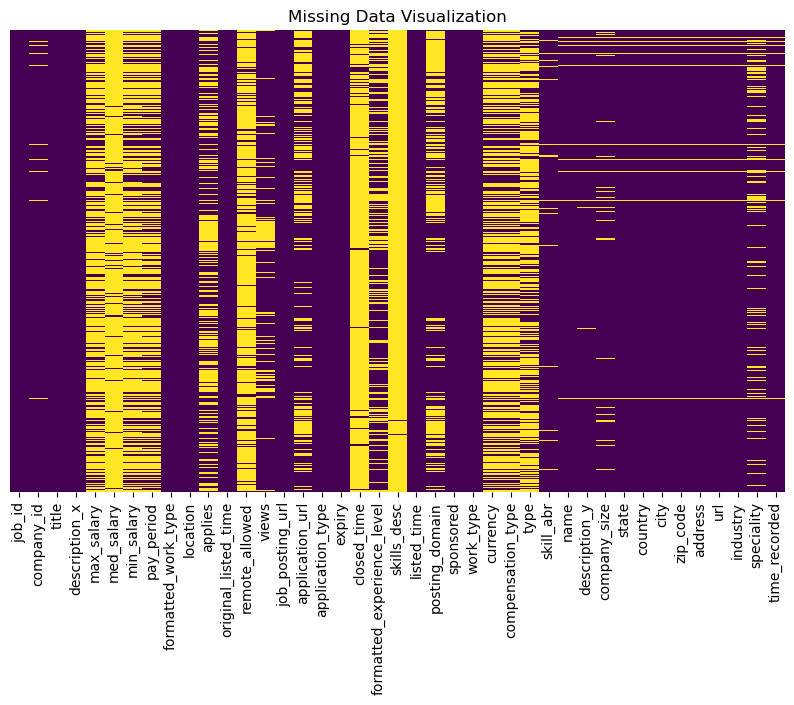

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Visualization")
plt.show()

In [38]:
merged_data.isnull().sum()

job_id                            0
company_id                      366
title                             0
description_x                     1
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
original_listed_time              0
remote_allowed                13546
views                          2763
job_posting_url                   0
application_url                6091
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
skills_desc                   15742
listed_time                       0
posting_domain                 6842
sponsored                         0
work_type                         0
currency                       9384
compensation_type              9384
type                        

###  Eliminating certain column to use for analysis, and then rename the column for better understanding

In [39]:
choosen_column = ['title','name','description_x','formatted_work_type','location','original_listed_time','application_type','sponsored','description_y','company_size','industry']
merged_data = merged_data[choosen_column]
merged_data

,title,name,description_x,formatted_work_type,location,original_listed_time,application_type,sponsored,description_y,company_size,industry
0,Licensed Insurance Agent,NaN,While many industries were hurt by the last fe...,Full-time,"Chico, CA",1692749193000,ComplexOnsiteApply,1,NaN,NaN,NaN
1,Sales Manager,CargoLogin.,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",1692834553000,ComplexOnsiteApply,0,CargoLogin is a freight and logistics company ...,1.0,Transportation/Trucking/Railroad
2,Model Risk Auditor,Employvision Inc.,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1692729872000,ComplexOnsiteApply,0,Employvision is a talent acquisition and manag...,1.0,Staffing & Recruiting
3,Business Manager,First Baptist Church Forney,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",1692832007000,ComplexOnsiteApply,0,NaN,2.0,Religious Institutions
4,NY Studio Assistant,Ken Fulk Inc,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",1692867714000,ComplexOnsiteApply,1,"Ken Fulk Inc, is a creative think tank based o...",1.0,Design
...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,Aspire Bakeries,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",1692742985000,OffsiteApply,0,Aspire Bakeries is a North American baking com...,5.0,"Food Production, Food Production, Food Product..."
15882,Unit Secretary,Holy Name Medical Center,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",1692662400000,OffsiteApply,0,"Holy Name is a fully accredited, not-for-profi...",5.0,"Hospital & Health Care, Hospital & Health Care"
15883,"Radiology Aide, Perdiem",Holy Name Medical Center,"Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",1690582996000,OffsiteApply,0,"Holy Name is a fully accredited, not-for-profi...",5.0,"Hospital & Health Care, Hospital & Health Care"
15884,MRI Manager,Columbia University Irving Medical Center,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",1692742996000,OffsiteApply,0,Columbia University Irving Medical Center (CUI...,7.0,Hospital & Health Care


In [40]:
cleaned_column_name = {'title': 'job_title', 'name': 'company_name', 'description_x': 'job_description',
               'formatted_work_type': 'work_type','original_listed_time': 'listed_time','description_y': 'company_description'}
df = merged_data.rename(columns=cleaned_column_name, inplace=True)
df = merged_data.dropna()
df

C:\Users\govin\AppData\Local\Temp\ipykernel_4628\1739935708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = merged_data.rename(columns=cleaned_column_name, inplace=True)


,job_title,company_name,job_description,work_type,location,listed_time,application_type,sponsored,company_description,company_size,industry
1,Sales Manager,CargoLogin.,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",1692834553000,ComplexOnsiteApply,0,CargoLogin is a freight and logistics company ...,1.0,Transportation/Trucking/Railroad
2,Model Risk Auditor,Employvision Inc.,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1692729872000,ComplexOnsiteApply,0,Employvision is a talent acquisition and manag...,1.0,Staffing & Recruiting
4,NY Studio Assistant,Ken Fulk Inc,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",1692867714000,ComplexOnsiteApply,1,"Ken Fulk Inc, is a creative think tank based o...",1.0,Design
5,Office Associate,Sunnyland Farms,Provide clerical and administrative support to...,Full-time,"Albany, GA",1692732089000,ComplexOnsiteApply,1,Here at Sunnyland Farms we have been growing a...,2.0,Retail
6,Education Manager,Paradigm Senior Services,"Company Snapshot Headquartered in North Miami,...",Full-time,United States,1692734354000,OffsiteApply,0,Paradigm provides a full back office solution ...,2.0,Computer Software
...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,Aspire Bakeries,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",1692742985000,OffsiteApply,0,Aspire Bakeries is a North American baking com...,5.0,"Food Production, Food Production, Food Product..."
15882,Unit Secretary,Holy Name Medical Center,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",1692662400000,OffsiteApply,0,"Holy Name is a fully accredited, not-for-profi...",5.0,"Hospital & Health Care, Hospital & Health Care"
15883,"Radiology Aide, Perdiem",Holy Name Medical Center,"Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",1690582996000,OffsiteApply,0,"Holy Name is a fully accredited, not-for-profi...",5.0,"Hospital & Health Care, Hospital & Health Care"
15884,MRI Manager,Columbia University Irving Medical Center,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",1692742996000,OffsiteApply,0,Columbia University Irving Medical Center (CUI...,7.0,Hospital & Health Care


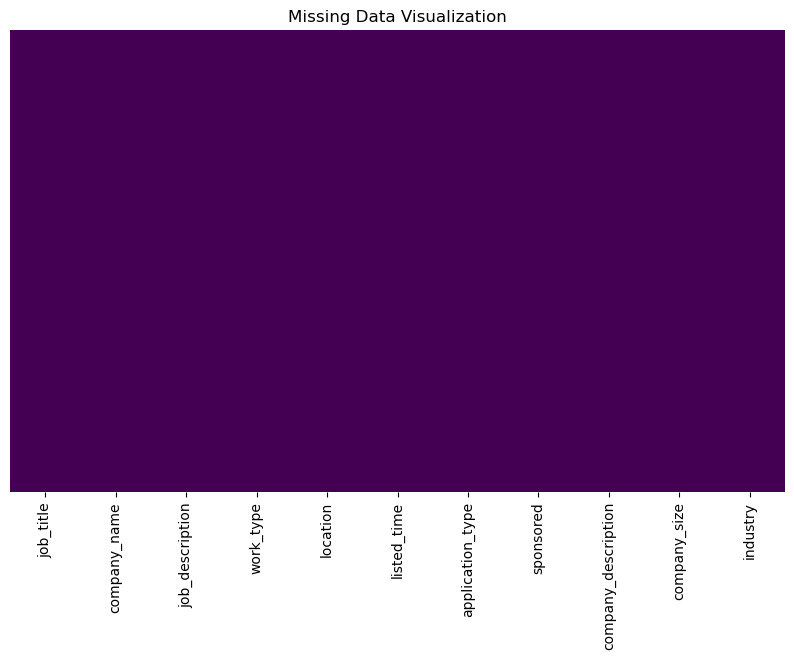

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Visualization")
plt.show()

In [42]:
df.head()

,job_title,company_name,job_description,work_type,location,listed_time,application_type,sponsored,company_description,company_size,industry
1,Sales Manager,CargoLogin.,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",1692834553000,ComplexOnsiteApply,0,CargoLogin is a freight and logistics company ...,1.0,Transportation/Trucking/Railroad
2,Model Risk Auditor,Employvision Inc.,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1692729872000,ComplexOnsiteApply,0,Employvision is a talent acquisition and manag...,1.0,Staffing & Recruiting
4,NY Studio Assistant,Ken Fulk Inc,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",1692867714000,ComplexOnsiteApply,1,"Ken Fulk Inc, is a creative think tank based o...",1.0,Design
5,Office Associate,Sunnyland Farms,Provide clerical and administrative support to...,Full-time,"Albany, GA",1692732089000,ComplexOnsiteApply,1,Here at Sunnyland Farms we have been growing a...,2.0,Retail
6,Education Manager,Paradigm Senior Services,"Company Snapshot Headquartered in North Miami,...",Full-time,United States,1692734354000,OffsiteApply,0,Paradigm provides a full back office solution ...,2.0,Computer Software


In [56]:
tech_it_keywords = [
    # Programming Languages
    'Python', 'Java', 'JavaScript', 'C++', 'Ruby', 'Swift', 'Kotlin', 'PHP', 'Perl', 'R', 'TypeScript', 'Scala',
    
    # Web Development
    'HTML', 'CSS', 'Angular', 'Vue.js', 'Node.js', 'Django', 'Flask', 'ASP.NET', 'Express.js', 'RESTful APIs',
    
    # Mobile Development
    'iOS', 'Android', 'Flutter', 'React Native', 'Xamarin', 'Mobile UX/UI',
    
    # Databases
    'SQL', 'NoSQL', 'MySQL', 'PostgreSQL', 'MongoDB', 'Redis', 'SQLite', 'MariaDB',
    
    # Cloud Computing
    'AWS', 'Azure', 'Google Cloud Platform', 'DevOps', 'Kubernetes', 'Serverless',
    
    # Operating Systems
    'Linux', 'Unix', 'Windows', 'macOS', 'Shell scripting',
    
    # Networking
    'TCP/IP', 'DNS', 'VPN', 'Firewall', 'LAN/WAN', 'Network Security',
    
    # Cybersecurity
    'Encryption', 'Threat Analysis', 'SIEM', 'Ethical Hacking', 'Incident Response'
]
data_science_keywords = [
    # Machine Learning
    'Supervised Learning', 'Unsupervised Learning', 'Reinforcement Learning', 'Neural Networks', 'Deep Learning', 'NLP', 'Computer Vision',
    
    # Data Analysis/Manipulation
    'Pandas', 'NumPy', 'SciPy', 'MATLAB', 'Data Cleaning', 'Data Wrangling', 'Data Visualization', 'Matplotlib', 'Seaborn', 'Plotly',
    
    # Statistical Analysis
    'Statistical Modeling', 'Hypothesis Testing', 'Regression Analysis', 'Time Series Analysis',
    
    # Big Data
    'Hadoop', 'Spark', 'Hive', 'HBase', 'Kafka', 'MapReduce',
    
    # Data Mining
    'Clustering', 'Classification', 'Association Rules', 'Anomaly Detection',
    
    # Data Engineering
    'ETL', 'Data Warehousing', 'Data Pipelines', 'SQL', 'NoSQL Databases'
]
software_dev_keywords = [
    # Software Development Methodologies
    'Agile', 'Scrum', 'Kanban', 'Waterfall', 'SDLC',
    
    # Version Control
    'Git', 'SVN', 'Mercurial',
    
    # Testing/Quality Assurance
    'Unit Testing', 'Integration Testing', 'Test Automation', 'TDD', 'BDD',
    
    # Software Architecture/Design
    'OOP', 'Design Patterns', 'MVC', 'Microservices', 'SOLID Principles',
    
    # DevOps
    'CI/CD', 'Jenkins', 'Travis CI', 'CircleCI', 'GitLab CI/CD',
    
    # Mobile App Development
    'Android Studio', 'Xcode', 'Mobile UX/UI Design', 'Cross-platform Development'
]


In [57]:
it_keywords=[] 
it_keywords.extend(tech_it_keywords)
it_keywords.extend(data_science_keywords)
it_keywords.extend(software_dev_keywords)
for item in it_keywords:
    print(item)

Python
Java
JavaScript
C++
Ruby
Swift
Kotlin
PHP
Perl
R
TypeScript
Scala
HTML
CSS
Angular
Vue.js
Node.js
Django
Flask
ASP.NET
Express.js
RESTful APIs
iOS
Android
Flutter
React Native
Xamarin
Mobile UX/UI
SQL
NoSQL
MySQL
PostgreSQL
MongoDB
Redis
SQLite
MariaDB
AWS
Azure
Google Cloud Platform
DevOps
Kubernetes
Serverless
Linux
Unix
Windows
macOS
Shell scripting
TCP/IP
DNS
VPN
Firewall
LAN/WAN
Network Security
Encryption
Threat Analysis
SIEM
Ethical Hacking
Incident Response
Supervised Learning
Unsupervised Learning
Reinforcement Learning
Neural Networks
Deep Learning
NLP
Computer Vision
Pandas
NumPy
SciPy
MATLAB
Data Cleaning
Data Wrangling
Data Visualization
Matplotlib
Seaborn
Plotly
Statistical Modeling
Hypothesis Testing
Regression Analysis
Time Series Analysis
Hadoop
Spark
Hive
HBase
Kafka
MapReduce
Clustering
Classification
Association Rules
Anomaly Detection
ETL
Data Warehousing
Data Pipelines
SQL
NoSQL Databases
Agile
Scrum
Kanban
Waterfall
SDLC
Git
SVN
Mercurial
Unit Testing
Inte

In [60]:
#filtering out just IT jobs
it_df = df[df['job_description'].str.contains(r'\b(?:' + '|'.join(it_keywords) + r')\b', case=False, regex=True)]
it_df['matched_keywords'] = it_df['job_description'].str.extractall(r'\b(' + '|'.join(it_keywords) + r')\b', flags=re.IGNORECASE).groupby(level=0).agg(', '.join)
df=it_df
df

,job_title,company_name,job_description,work_type,location,listed_time,application_type,sponsored,company_description,company_size,industry,matched_keywords
20,Customer Success & Services Marketing Manager,Genesys,Build something new with a world-class team.\n...,Full-time,"New York, United States",1690692604000,OffsiteApply,0,"Every year, Genesys® orchestrates billions of ...",6.0,"Computer Software, Computer Software, Computer...",CSS
22,IT Operations ServiceNow Admin,Elastic,Elastic is a free and open search company that...,Full-time,"Richmond, VA",1690693037000,OffsiteApply,0,"At Elastic, we help organizations, their emplo...",5.0,"Computer Software, Computer Software, Computer...","Agile, Windows, Windows"
26,Administrator,Wipro,"About Wipro:\n\nWipro Limited (NYSE: WIT, BSE:...",Full-time,"Minneapolis, MN",1692854059000,OffsiteApply,0,"Wipro Limited (NYSE: WIT, BSE: 507685, NSE: WI...",7.0,"Information Technology & Services, Information...","Windows, VPN"
35,Lead Software Engineer,"Multi Media, LLC",Who we are:Multi Media LLC is a technology com...,Full-time,United States,1692855939000,ComplexOnsiteApply,0,Multi Media is a full-service provider of live...,2.0,"Information Technology & Services, Information...","agile, Python, Django, CI/CD, Redis, AWS, Java..."
69,Teradata Developer,"Sapience, Inc",Duration: 6-12+ Months\nOverview of Role:Indiv...,Contract,United States,1692736866000,ComplexOnsiteApply,0,“Our combined software and consulting services...,1.0,Information Technology & Services,"Unix, ETL"
...,...,...,...,...,...,...,...,...,...,...,...,...
15862,Senior IT Project Manager,Allied OneSource,We are seeking an experienced and dynamic Seni...,Contract,"St Louis, MO",1692742505000,OffsiteApply,0,Connecting Great People with Great Opportuniti...,5.0,"Staffing & Recruiting, Staffing & Recruiting, ...","Agile, Agile"
15866,"Content Programs & Activations Lead, Cash App ...",Cash App,Company Description\nIt all started with an id...,Full-time,"New York, NY",1692742711000,ComplexOnsiteApply,0,It all started with an idea at Block in 2013. ...,5.0,"Computer Software, Computer Software, Computer...",C
15867,Disputes Operations Lead,Square,Company Description\nSince we opened our doors...,Full-time,"St Louis, MO",1692742718000,OffsiteApply,0,"Since we opened our doors in 2009, the world o...",5.0,"Computer Software, Computer Software","SQL, C"
15873,Quality Assurance Automation Engineer,VySystems,Should be good in core java.Banking Liquidity ...,Full-time,"Tampa, FL",1692742806000,ComplexOnsiteApply,1,Vy Systems is a part of vy.ventures and is in ...,4.0,"Information Technology & Services, Information...","java, Agile, TDD, BDD, Java, Java, TDD, BDD"


In [61]:
# Initialize a CountVectorizer
vectorizer_bow = CountVectorizer(stop_words='english', lowercase=True)

# Fit and transform the 'job_description' column
X_bow = vectorizer_bow.fit_transform(df['job_description'])

# Convert the result to a dense array and put it in DataFrame for better visualization
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
print(df_bow)

      00  000  0001  000122  00040  0008  000bonus  000guaranteed  000in  \
0      2    0     0       0      0     0         0              0      0   
1      0    0     0       0      0     0         0              0      0   
2      0    1     0       0      0     0         0              0      0   
3      0    2     0       0      0     0         0              0      0   
4      0    0     0       0      0     0         0              0      0   
...   ..  ...   ...     ...    ...   ...       ...            ...    ...   
4269   0    2     0       0      0     0         0              0      0   
4270   0    1     0       0      0     0         0              0      0   
4271   0    0     0       0      0     0         0              0      0   
4272   0    0     0       0      0     0         0              0      0   
4273   0    0     0       0      0     0         0              0      0   

      000join  ...  énoncé  épanouir  équipe  équitable  étudiant  êtes  être  \
0     

In [65]:
# Initialize a TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform the 'job_description' column
X_tfidf = vectorizer_tfidf.fit_transform(df['job_description'])

# Convert the result to a dense array and put it in DataFrame for better visualization
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
print(df_tfidf)

            00       000  0001  000122  00040  0008  000bonus  000guaranteed  \
0     0.056465  0.000000   0.0     0.0    0.0   0.0       0.0            0.0   
1     0.000000  0.000000   0.0     0.0    0.0   0.0       0.0            0.0   
2     0.000000  0.033541   0.0     0.0    0.0   0.0       0.0            0.0   
3     0.000000  0.065621   0.0     0.0    0.0   0.0       0.0            0.0   
4     0.000000  0.000000   0.0     0.0    0.0   0.0       0.0            0.0   
...        ...       ...   ...     ...    ...   ...       ...            ...   
4269  0.000000  0.074978   0.0     0.0    0.0   0.0       0.0            0.0   
4270  0.000000  0.012187   0.0     0.0    0.0   0.0       0.0            0.0   
4271  0.000000  0.000000   0.0     0.0    0.0   0.0       0.0            0.0   
4272  0.000000  0.000000   0.0     0.0    0.0   0.0       0.0            0.0   
4273  0.000000  0.000000   0.0     0.0    0.0   0.0       0.0            0.0   

      000in  000join  ...  énoncé  épan

In [63]:
#df.to_csv('cleaned_data.csv', index=False)

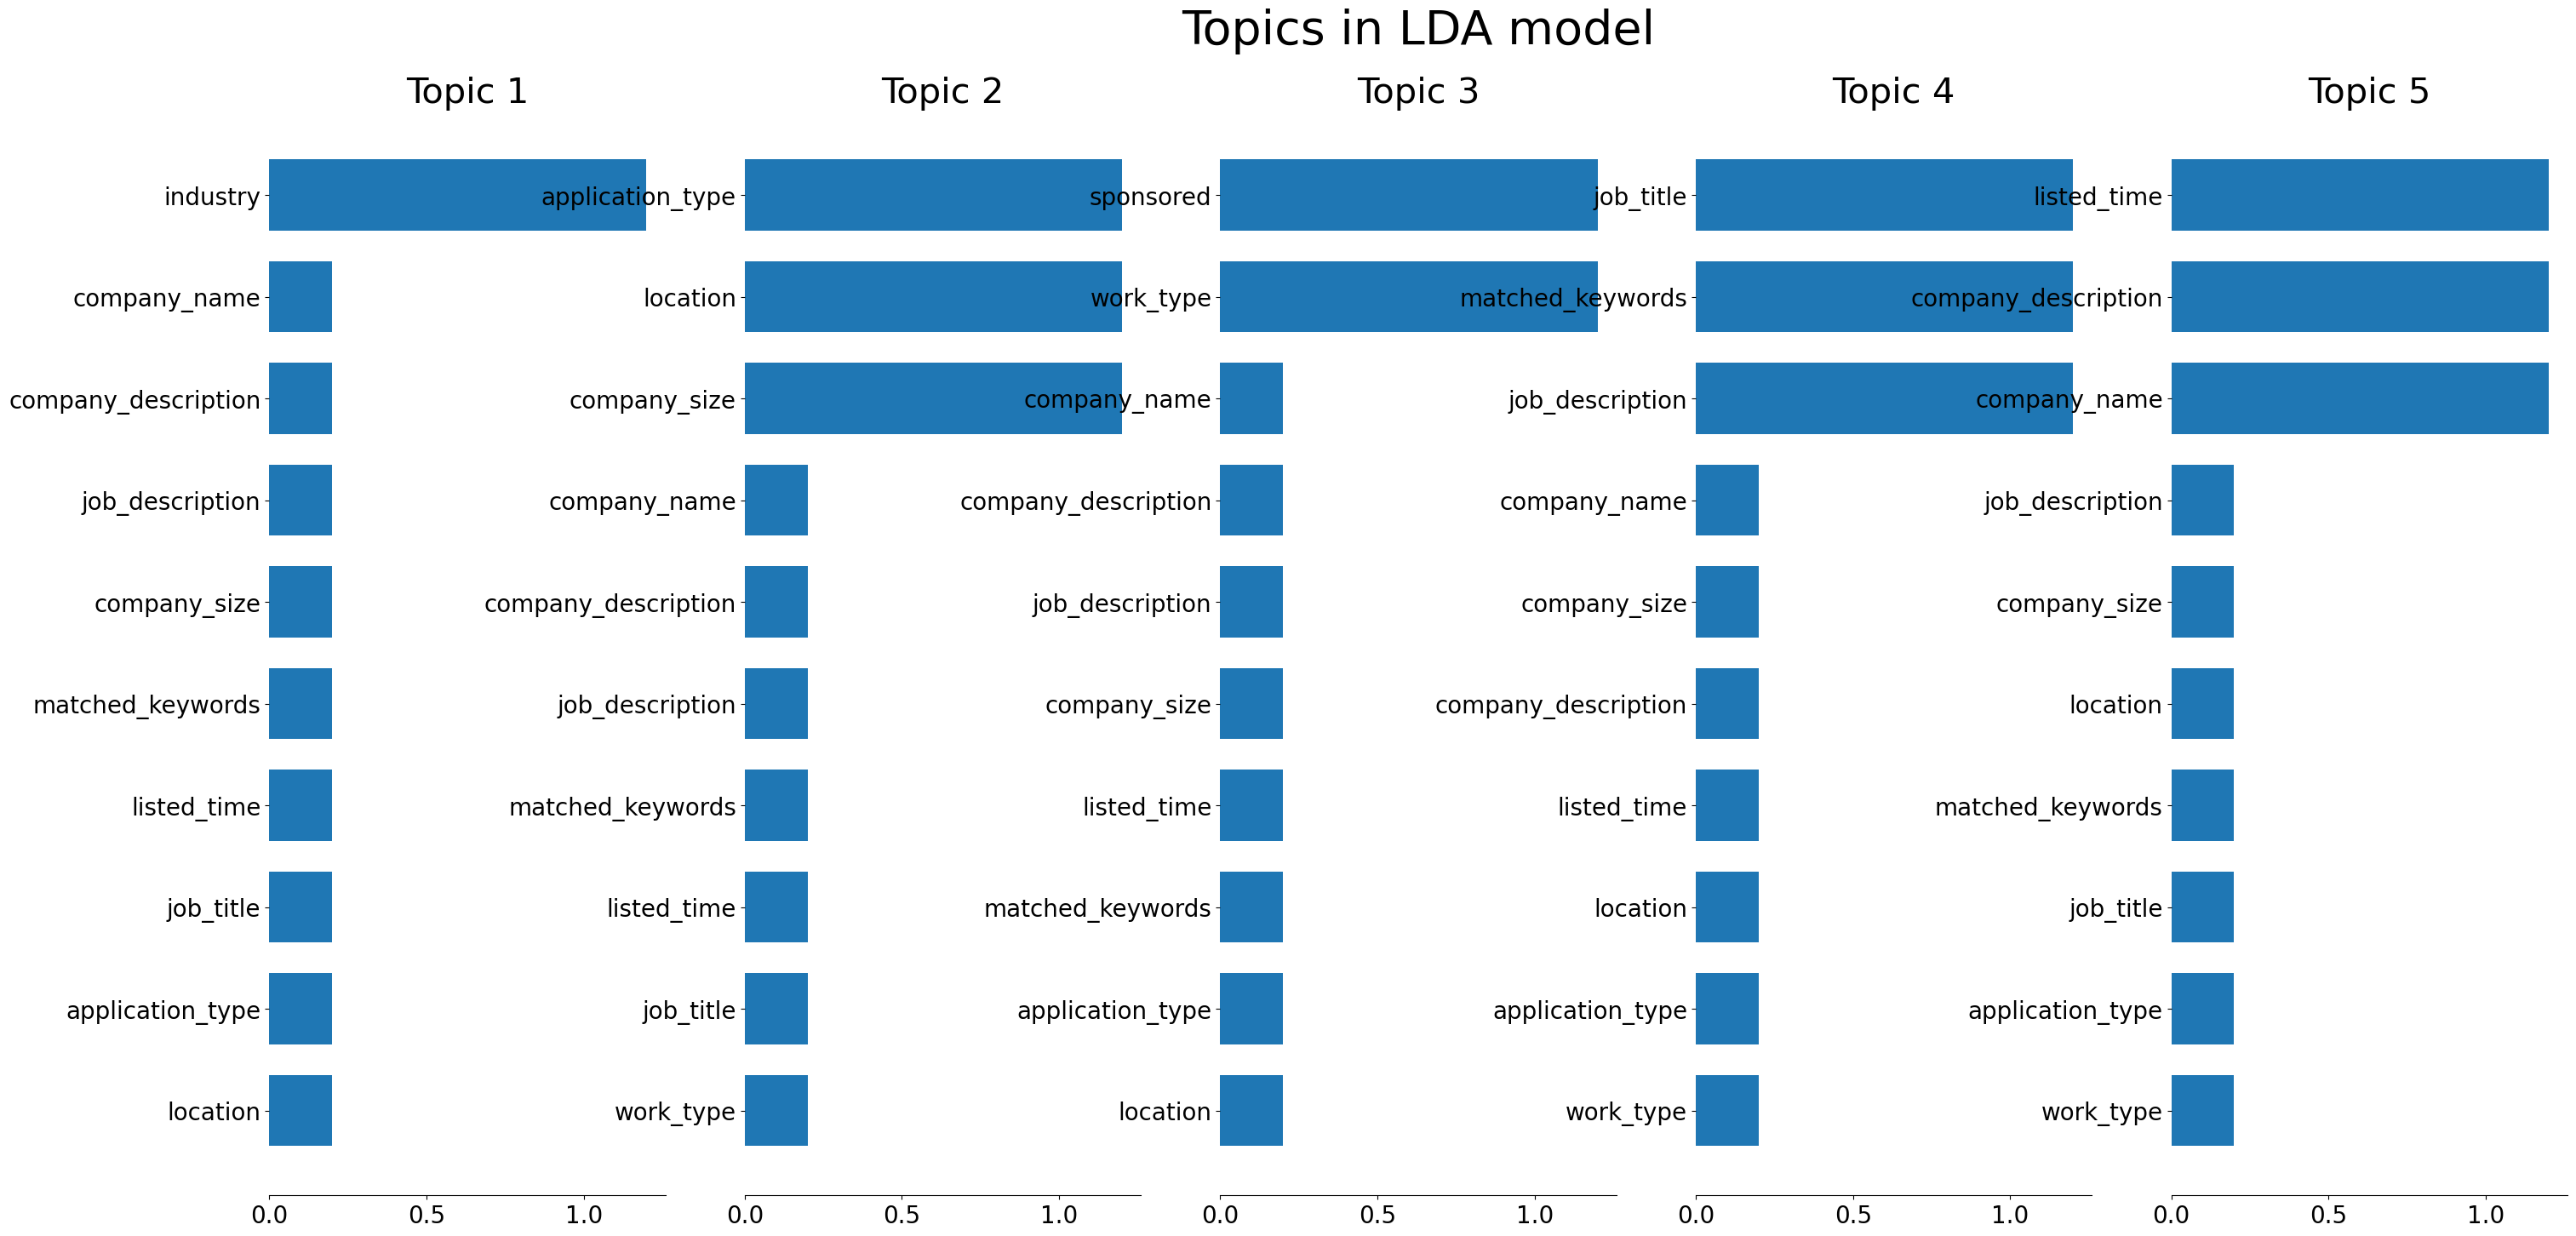

In [66]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_features = 1000  # Define the number of features

# Assuming 'documents' is your list of text data
vectorizer = CountVectorizer(max_df=0.7, min_df=1, max_features=n_features, stop_words='english')
tf = vectorizer.fit_transform(df)  # Assuming 'documents' is defined somewhere

# Fitting an LDA model
n_topics = 5  # Define the number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)  # Initialize LDA model
lda.fit(tf)  # Fit the LDA model on the transformed data

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, n_topics, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, left=0.05, right=0.95, hspace=0.3)
    plt.show()

# Plotting the top words in each topic
tf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, 10, 'Topics in LDA model')

In [67]:
df.to_csv('cleaned_data2.csv', index=False)

In [68]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources (run this if you haven't downloaded NLTK resources)
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and extracting keywords
stop_words = set(stopwords.words('english'))  # Set of English stopwords
industry_keywords = []

for desc in df['job_description']:
    tokens = word_tokenize(desc.lower())  # Tokenize and convert to lowercase
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    industry_keywords.extend(words)

# Get the most common industry-specific keywords
from collections import Counter

keyword_counter = Counter(industry_keywords)
most_common_keywords = keyword_counter.most_common(10)  # Get the top 10 most common keywords

print("\nTop 10 industry-specific keywords:")
print(most_common_keywords)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\govin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\govin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 10 industry-specific keywords:
[('experience', 16401), ('work', 12916), ('team', 9702), ('business', 8840), ('data', 8387), ('skills', 7255), ('including', 7165), ('management', 7006), ('support', 6441), ('job', 6277)]


In [69]:
unique_job_titles = df['job_title'].unique()
print (len(df['job_title']))
print (len(df['job_title'].unique()))


4274
3205


In [74]:
df

,job_title,company_name,job_description,work_type,location,listed_time,application_type,sponsored,company_description,company_size,industry,matched_keywords,job_title_lemmatized,job_description_lemmatized
20,Customer Success & Services Marketing Manager,Genesys,Build something new with a world-class team.\n...,Full-time,"New York, United States",1690692604000,OffsiteApply,0,"Every year, Genesys® orchestrates billions of ...",6.0,"Computer Software, Computer Software, Computer...",CSS,Customer Success & Services Marketing Manager,build something new with a world - class team ...
22,IT Operations ServiceNow Admin,Elastic,Elastic is a free and open search company that...,Full-time,"Richmond, VA",1690693037000,OffsiteApply,0,"At Elastic, we help organizations, their emplo...",5.0,"Computer Software, Computer Software, Computer...","Agile, Windows, Windows",IT Operations ServiceNow Admin,elastic be a free and open search company that...
26,Administrator,Wipro,"About Wipro:\n\nWipro Limited (NYSE: WIT, BSE:...",Full-time,"Minneapolis, MN",1692854059000,OffsiteApply,0,"Wipro Limited (NYSE: WIT, BSE: 507685, NSE: WI...",7.0,"Information Technology & Services, Information...","Windows, VPN",administrator,about Wipro : \n\n Wipro Limited ( NYSE : WIT ...
35,Lead Software Engineer,"Multi Media, LLC",Who we are:Multi Media LLC is a technology com...,Full-time,United States,1692855939000,ComplexOnsiteApply,0,Multi Media is a full-service provider of live...,2.0,"Information Technology & Services, Information...","agile, Python, Django, CI/CD, Redis, AWS, Java...",Lead Software Engineer,who we be : Multi Media LLC be a technology co...
69,Teradata Developer,"Sapience, Inc",Duration: 6-12+ Months\nOverview of Role:Indiv...,Contract,United States,1692736866000,ComplexOnsiteApply,0,“Our combined software and consulting services...,1.0,Information Technology & Services,"Unix, ETL",Teradata developer,duration : 6 - 12 + month \n overview of Role ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15862,Senior IT Project Manager,Allied OneSource,We are seeking an experienced and dynamic Seni...,Contract,"St Louis, MO",1692742505000,OffsiteApply,0,Connecting Great People with Great Opportuniti...,5.0,"Staffing & Recruiting, Staffing & Recruiting, ...","Agile, Agile",senior IT Project Manager,we be seek an experienced and dynamic Senior I...
15866,"Content Programs & Activations Lead, Cash App ...",Cash App,Company Description\nIt all started with an id...,Full-time,"New York, NY",1692742711000,ComplexOnsiteApply,0,It all started with an idea at Block in 2013. ...,5.0,"Computer Software, Computer Software, Computer...",C,"Content Programs & Activations Lead , Cash App...",Company Description \n it all start with an id...
15867,Disputes Operations Lead,Square,Company Description\nSince we opened our doors...,Full-time,"St Louis, MO",1692742718000,OffsiteApply,0,"Since we opened our doors in 2009, the world o...",5.0,"Computer Software, Computer Software","SQL, C",Disputes Operations Lead,Company Description \n since we open our door ...
15873,Quality Assurance Automation Engineer,VySystems,Should be good in core java.Banking Liquidity ...,Full-time,"Tampa, FL",1692742806000,ComplexOnsiteApply,1,Vy Systems is a part of vy.ventures and is in ...,4.0,"Information Technology & Services, Information...","java, Agile, TDD, BDD, Java, Java, TDD, BDD",Quality Assurance Automation Engineer,should be good in core java . banking Liquidit...
